<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 (Python)

In this problem, you will be working with a dataset that contains instances of dermatology cancer occurrences. The dataset can be downloaded from https://datahub.io/machine-learning/dermatology#data

Load the data.

In [ ]:
import pandas as pd

dermatology = pd.read_csv("https://raw.githubusercontent.com/kgazaleh/thwnd_2000-IDS/main/HW7/dermatology.csv")
dermatology

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


Check for any missing values and impute, if necessary.

In [ ]:
# Check for missing values
dermatology.isnull().values.any()

True

In [ ]:
# Impute
# Load the imputer package
from sklearn.impute import SimpleImputer

# also try mean or most_frequent
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

dermatology_imputed = imputer.fit_transform(dermatology.values.reshape(-1,1))[:,0]

print(dermatology_imputed)

[ 2.  2.  0. ...  0. 35.  1.]


Plot the distribution of disease vs. age in order to understand the relationship between the two (use the same format as shown below). Is age a good indicator of disease? Fully explain your answer.
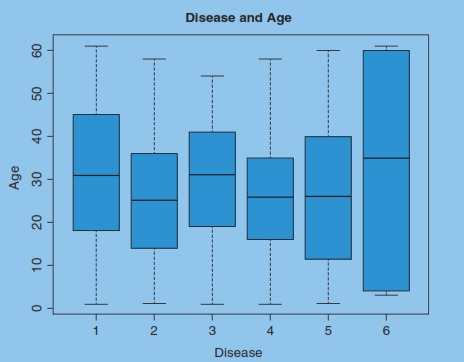

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


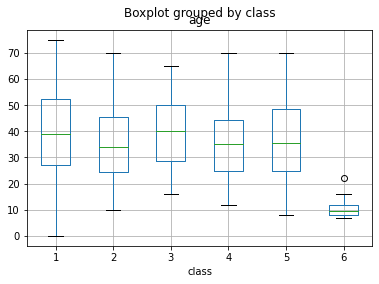

In [ ]:
#Plot the distribution of disease vs. age
dermatology.boxplot('age', 'class')

Age is not a great indicator of disease because many of the diseases are consistent among similar ranges of ages.

Use contingency tables to determine which ordinal attributes have the most leverage on disease. Plot the obtained results.

In [ ]:
#Rename class column
dermatology.rename(columns={'class': 'Class'}, inplace=True)

In [ ]:
#Contingency table age
p_crosstab = pd.crosstab(dermatology.Class, dermatology.age)
print(p_crosstab)

age    0.0   7.0   8.0   9.0   10.0  12.0  13.0  15.0  16.0  17.0  ...  60.0  \
Class                                                              ...         
1         1     0     1     1     1     0     0     1     0     1  ...     6   
2         0     0     0     0     2     0     0     1     1     0  ...     0   
3         0     0     0     0     0     0     0     0     1     0  ...     2   
4         0     0     0     0     0     1     0     0     1     1  ...     2   
5         0     0     1     0     0     0     0     0     1     3  ...     1   
6         0     4     5     1     4     2     2     0     1     0  ...     0   

age    61.0  62.0  63.0  64.0  65.0  67.0  68.0  70.0  75.0  
Class                                                        
1         1     4     0     0     1     1     0     1     1  
2         1     0     0     0     0     0     0     1     0  
3         0     1     0     0     1     0     0     0     0  
4         0     2     0     0     0     0     0  

In [ ]:
#Contingency table itching
p_crosstab = pd.crosstab(dermatology.Class, dermatology.itching)
print(p_crosstab)

itching   0   1   2   3
Class                  
1        55  22  21  14
2         9  16  25  11
3         2   9  28  33
4        33  10   5   1
5         8   7  20  17
6        11   8   1   0


In [ ]:
#Contingency table family history
p_crosstab = pd.crosstab(dermatology.Class, dermatology.family_history)
print(p_crosstab)

family_history   0   1
Class                 
1               80  32
2               58   3
3               71   1
4               49   0
5               52   0
6               10  10


In [ ]:
#Contingency table scaling
p_crosstab = pd.crosstab(dermatology.Class, dermatology.scaling)
print(p_crosstab)

scaling  0   1   2   3
Class                 
1        0  13  64  35
2        0   7  43  11
3        2  28  37   5
4        0  24  25   0
5        6  34  11   1
6        0   5  15   0


In [ ]:
#Contingency table focal_hypergranulosis
p_crosstab = pd.crosstab(dermatology.Class, dermatology.focal_hypergranulosis)
print(p_crosstab)

focal_hypergranulosis    0   1   2   3
Class                                 
1                      112   0   0   0
2                       61   0   0   0
3                        2  12  43  15
4                       49   0   0   0
5                       52   0   0   0
6                       19   1   0   0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


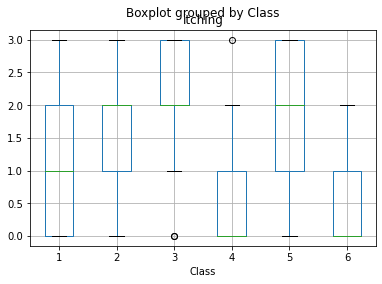

In [ ]:
#Plot itching vs. disease
dermatology.boxplot('itching', 'Class')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


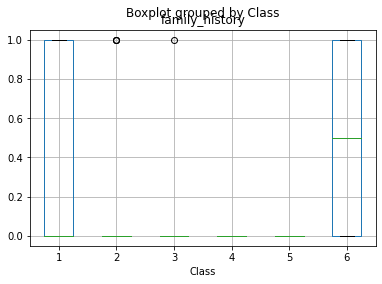

In [ ]:
#Plot family_history vs. disease
dermatology.boxplot('family_history', 'Class')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


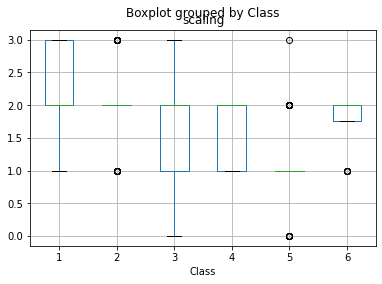

In [ ]:
#Plot scaling vs. disease
dermatology.boxplot('scaling', 'Class')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


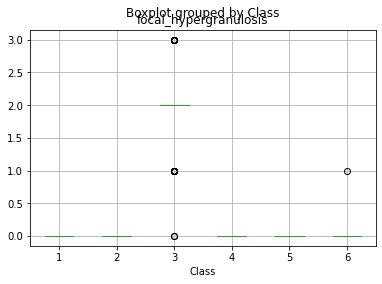

In [ ]:
#Plot focal_hypergranulosis vs. disease
dermatology.boxplot('focal_hypergranulosis', 'Class')

Create a new column disease_1 by extracting only those records where the Disease=1 (psoriasis) , assigning “1” for those rows in the newly created  column, and marking “0” for the rest. 

In [ ]:
dermatology['disease_1'] = np.where(dermatology['Class']!= 1, 0, 1)
dermatology.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,Class,disease_1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0


Create four models and evaluate each using 3-fold cross-validation:
*   A linear regression model for disease_1 vs. age even though disease_1 is a categoric variable. Plot the regression line, and compute the MSE and r-squared values for the model.

*   An NB classifier model for disease_1 vs. the top ranking (relevant) 5 attributes. Display the overall accuracy and the confusion matrix.

*   A decision tree model (Gini or Entropy) for the entire feature space vs. the disease column. Display the relevant information about the generated tree, and print the confusion matrix.
*   A random forest model for the entire feature space vs. the disease column. Display the relevant information about one of the generated trees, and print the confusion matrix. Plot the model's .feature_importances_ which is a measure of the accumulation of the impurity decrease within each tree.

In [ ]:
dermatology.isnull().any().any()

True

In [ ]:
dermatology.dropna(inplace=True)

dermatology.shape

(358, 35)

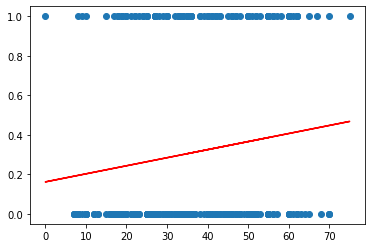

In [ ]:
# Perform regression to find the best line to goes through these points

from sklearn.linear_model import LinearRegression

X = dermatology['age'].values.reshape(-1,1)

Y = dermatology['disease_1'].values.reshape(-1,1)

# Create the model
LRmodel = LinearRegression()  

# Perform linear regression
LRmodel.fit(X, Y)   

# Make predictions
Y_pred = LRmodel.predict(X)  


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

In [ ]:
#MSE and R2
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  0.21002121747081612
R2:  0.01823104949740384


In [ ]:
#Encode the data set
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_derm = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, dermatology.shape[1]):
    if dermatology.dtypes[i]=='object' or dermatology.dtypes[i]=='bool':
        encoded_derm[dermatology.columns[i]] = le.fit_transform(dermatology[dermatology.columns[i]])



print("-=========================")
print(dermatology)
print("-=========================")
encoded_derm

-=========================
     index  erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0        0         2        2                 0        3                   0   
1        1         3        3                 3        2                   1   
2        2         2        1                 2        3                   1   
3        3         2        2                 2        0                   0   
4        4         2        3                 2        2                   2   
..     ...       ...      ...               ...      ...                 ...   
361    361         2        1                 1        0                   1   
362    362         3        2                 1        0                   1   
363    363         3        2                 2        2                   3   
364    364         2        1                 3        1                   2   
365    365         3        2                 2        0                   0   

     polygon

""


In [ ]:
#An NB classifier model for disease_1 vs. the top ranking (relevant) 5 attributes. Display the overall accuracy and the confusion matrix.
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_derm['disease_1']
y = encoded_derm.iloc[:,4]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print(X_train)
print(X_test)


KeyError: ignored

In [ ]:
#A decision tree model (Gini or Entropy) for the entire feature space vs. the disease column. Display the relevant information about the generated tree, and print the confusion matrix.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# The CART tree
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)


# Plot the tree
cn = ['', '']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

NameError: ignored

In [ ]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

# Record CART's predictions
cart_predictions = cart_classifier.predict(X_test)

# Compute TP, TN, FP, FN values for CART
cart_cm = confusion_matrix(y_true=y_test, 
                           y_pred = cart_predictions)

# Print CART's confusion matrix
print(cart_cm)

NameError: ignored

In [ ]:
#A random forest model for the entire feature space vs. the disease column. Display the relevant information about one of the generated trees, and print the confusion matrix. Plot the model's .feature_importances_ which is a measure of the accumulation of the impurity decrease within each tree.
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

NameError: ignored